# **Examen de certificación – Intento 1**

*Descripción*

Fundamentos de Data Science

Analizando los Salarios en Ciencia de Datos en 2023

## *Requisitos:*

Tu tarea es **limpiar y explorar** un dataset que contiene información sobre los salarios en el campo de la ciencia de datos para el año 2023. Este análisis es crucial para **entender las tendencias salariales y los factores que influyen en las diferencias de salarios en esta industria**.

El dataset puede ser encontrado en el siguiente link.
https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023


# Previos
- Cargar librerías
- Cargar datos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/ds_salaries.csv')

# 1) Limpieza de datos con Python

In [3]:
# Revisar información inicial del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


## a) Detección y eliminación de valores duplicados:
Asegúrate de que cada registro en el dataset sea único.


In [7]:
# Consultar si hay duplicados, cuántos
print("a. ¿Hay duplicados en el DataFrame?")
print(df.duplicated().any())
print("\nb. ¿Cuántos duplicados hay en el DataFrame?")
print(df.duplicated().sum())

a. ¿Hay duplicados en el DataFrame?
True

b. ¿Cuántos duplicados hay en el DataFrame?
1171


In [8]:
# Eliminar duplicados
df = df.drop_duplicates()

In [9]:
# Revisar información inicial del df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


### *Análisis*
Al eliminarse los duplicados, se pasó de 3755 filas de registros a 2584 filas de regristros únicos


## b) Verificación y ajuste de tipos de datos:
Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

Según la documentación del dataset:

Data Science Job Salaries Dataset contains 11 columns, each are:

1. work_year: The year the salary was paid.

2. experience_level: The experience level in the job during the year

3. employment_type: The type of employment for the role

4. job_title: The role worked in during the year.

5. salary: The total gross salary amount paid.

6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.

7. salaryinusd: The salary in USD

8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

9. remote_ratio: The overall amount of work done remotely

10. company_location: The country of the employer's main office or contracting branch

11. company_size: The median number of people that worked for the company during the year

In [17]:
# Realizo el siguiente bucle para revisar valores únicos y el conteo de estos en cada columna
for column in df.columns:
    print(f"\nConteo de valores únicos en la columna '{column}':")
    print(df[column].dtype,'\n',df[column].value_counts().sort_index())


Conteo de valores únicos en la columna 'work_year':
int64 
 work_year
2020      75
2021     228
2022    1125
2023    1156
Name: count, dtype: int64

Conteo de valores únicos en la columna 'experience_level':
object 
 experience_level
EN     270
EX      96
MI     664
SE    1554
Name: count, dtype: int64

Conteo de valores únicos en la columna 'employment_type':
object 
 employment_type
CT      10
FL      10
FT    2547
PT      17
Name: count, dtype: int64

Conteo de valores únicos en la columna 'job_title':
object 
 job_title
3D Computer Vision Researcher     4
AI Developer                     11
AI Programmer                     2
AI Scientist                     16
Analytics Engineer               91
                                 ..
Research Engineer                33
Research Scientist               65
Software Data Engineer            2
Staff Data Analyst                1
Staff Data Scientist              1
Name: count, Length: 93, dtype: int64

Conteo de valores únicos en la col

## *Análisis*
No encontré algún tipo de dato que requisiera ser cambiado, si mucho el remote_ratio, que podría cambiarse de un int a object, así como cambiar los datos

Así que, se realizó el cambio (se muestra en las siguientes líneas de código) y se verificó estos datos

In [18]:
# Reemplazar valores numéricos en 'remote_ratio' por etiquetas de texto
df['remote_ratio'] = df['remote_ratio'].replace({0: 'Onsite', 50: 'Hybrid', 100: 'Remote'})

In [19]:
# Valores únicos en una columna remote_ratio
print(df['remote_ratio'].unique())
# Número de valores únicos en una columna remote_ratio
print(df['remote_ratio'].nunique())

['Remote' 'Onsite' 'Hybrid']
3


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   object
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(3), object(8)
memory usage: 242.2+ KB


## c) Consistencia en valores categóricos:
Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’).

In [42]:
# Valores únicos en una columna job_title
v_u_job_title = sorted(df['job_title'].unique())
v_u_job_title

['3D Computer Vision Researcher',
 'AI Developer',
 'AI Programmer',
 'AI Scientist',
 'Analytics Engineer',
 'Applied Data Scientist',
 'Applied Machine Learning Engineer',
 'Applied Machine Learning Scientist',
 'Applied Scientist',
 'Autonomous Vehicle Technician',
 'Azure Data Engineer',
 'BI Analyst',
 'BI Data Analyst',
 'BI Data Engineer',
 'BI Developer',
 'Big Data Architect',
 'Big Data Engineer',
 'Business Data Analyst',
 'Business Intelligence Engineer',
 'Cloud Data Architect',
 'Cloud Data Engineer',
 'Cloud Database Engineer',
 'Compliance Data Analyst',
 'Computer Vision Engineer',
 'Computer Vision Software Engineer',
 'Data Analyst',
 'Data Analytics Consultant',
 'Data Analytics Engineer',
 'Data Analytics Lead',
 'Data Analytics Manager',
 'Data Analytics Specialist',
 'Data Architect',
 'Data DevOps Engineer',
 'Data Engineer',
 'Data Infrastructure Engineer',
 'Data Lead',
 'Data Management Specialist',
 'Data Manager',
 'Data Modeler',
 'Data Operations Analyst'

### *Análisis*
Solo revisé la columna job_title, porque no consideré que las otras pudieran tener este tipo de inconscistencias en valores categóricos

Si bien se podría hacer algunos cambios que noté manualmente, como:

'Finance Data Analyst' y 'Financial Data Analyst' ambos por uno solo,
o,
'Power BI Developer' y 'BI Developer' ambos por uno solo

No realiçe ningun cambio porque es de mi entender que, para una empresa El Finance puede hacer algo que no hace el Financial, así mismo, el BI Developer puede que no solo use Power BI, sino otras herramientas de desarrollo BI, así que preferí dejarlo como estan

## d) Manejo de valores faltantes:
Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.


In [27]:
# Identificar valores nulos en todo el DataFrame
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


### *Análisis*
No parece haber datos faltantes o nulos en el df

## e) Detección de datos anómalos:
Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).


In [29]:
df.describe().round(1)

,work_year,salary,salary_in_usd
count,2584.0,2584.0,2584.0
mean,2022.3,210365.3,133409.3
std,0.7,808037.5,67136.8
min,2020.0,6000.0,5132.0
25%,2022.0,90000.0,84975.0
50%,2022.0,134630.0,130000.0
75%,2023.0,182562.5,175000.0
max,2023.0,30400000.0,450000.0


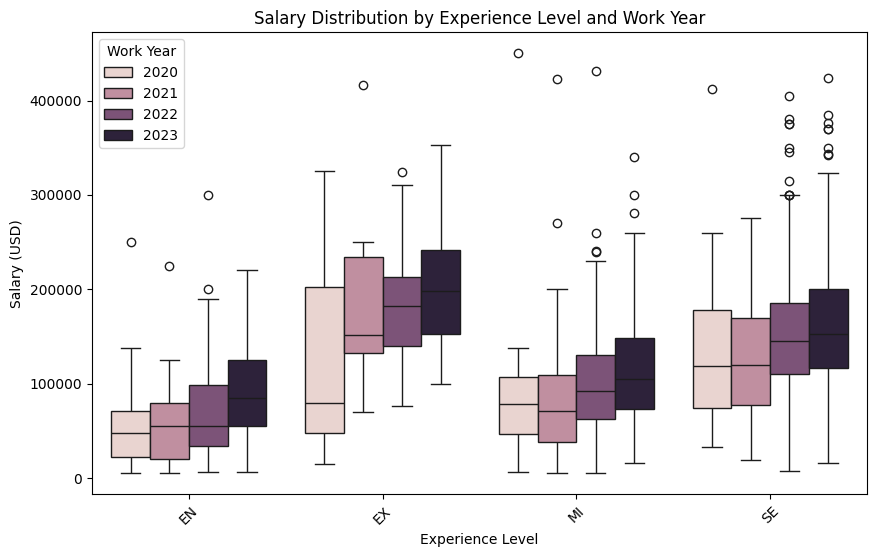

In [36]:
# Gráfico de Boxplot para mirar Salario por año y nivel de experiencia
experience_order = ['EN', 'EX', 'MI', 'SE']

plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', hue='work_year', data=df, order=experience_order)
plt.title('Salary Distribution by Experience Level and Work Year')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Work Year')
plt.show()

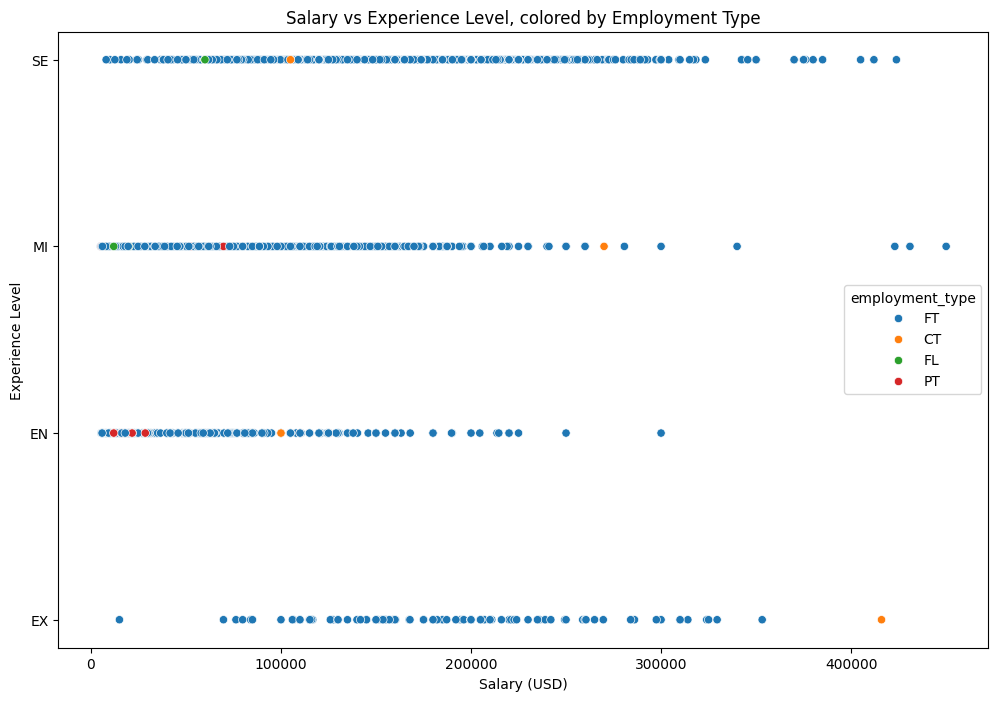

In [35]:
# Gráfico de dispersión para mirar salario por tipo de empleo y nivel experiencia

plt.figure(figsize=(12, 8))
sns.scatterplot(x='salary_in_usd', y='experience_level', hue='employment_type', data=df)
plt.title('Salary vs Experience Level, colored by Employment Type')
plt.xlabel('Salary (USD)')
plt.ylabel('Experience Level')
plt.show()

# *Análisis*
Conforme lo encontrado al revisar las estadísticas básicas de las variables cuantitativas del df, solo trabajando con la variable de salario en dólares (que es uniforme para todos, independiente de la cantidad o moneda del salario por el país), se puede ver que una media de 133409.3 que es cercana a la mediana (así que hay una tendencia de que estén los datos bastante parejos), pero con un valor mínimo de 5132 bastante alejado del q1 de 84975 y con un valor máximo de 450000 bastante alejado del q3 de 175000 sugieren que hay cosas por revisar.

Cuando se realiza el boxplor y se explora por varias variables se puede observar que hay por un lado, aumento de los salarios conforme los años según el nivel de experiencia, pero que también se presentan algunos outliers que se deberían trabajar según el nivel, supongo que con el rango intercuartilico se podrían manejar mejor, en este caso, si considero los niveles EN: entry-level, EX: intermediate, MI: mid-level, SE: senior, este tipo de valores solo serían factibles o de manera real en los más altos niveles de experiencia.

Resulta que buscando alguna forma de "explicación" o justificación, encontré el siguiente artículo: https://www.interviewquery.com/p/highest-paying-data-science-jobs donde es posible observar que este tipo de salarios son posibles, así que no consideré pertinente eliminarlos o manipularlos, pero supondría que, para situaciones más adelante si sería necesario revisar y ajustar todo a un rango.

Revisados los valores superiores que son outliers quedan valores hacía abajo, que si bien, no hay datos outliers, confirmé que salarios de 5000 dólares anuales son posibles, supuse que estos pudieran ser debidos a trabajos puntuales o contratos, no empleos de tiempo completo, pero en el diagrama de dispersión, y revisando el conteo de valores únicos por columna que se realizó más arriba, la mayor cantidad de los datos está en FT (supondría yo Full-Time), mientras que el resto no llegan a ser más de 10 o 17 observaciones, así que se podría mirar (de alguna manera) si esta diferencia tan marcada de salarios puede deberse a ubicación, tanto de la empresa como del empleado




# 2) Exploración de datos con Python:

## a) Visualizaciones exploratorias univariadas:
Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

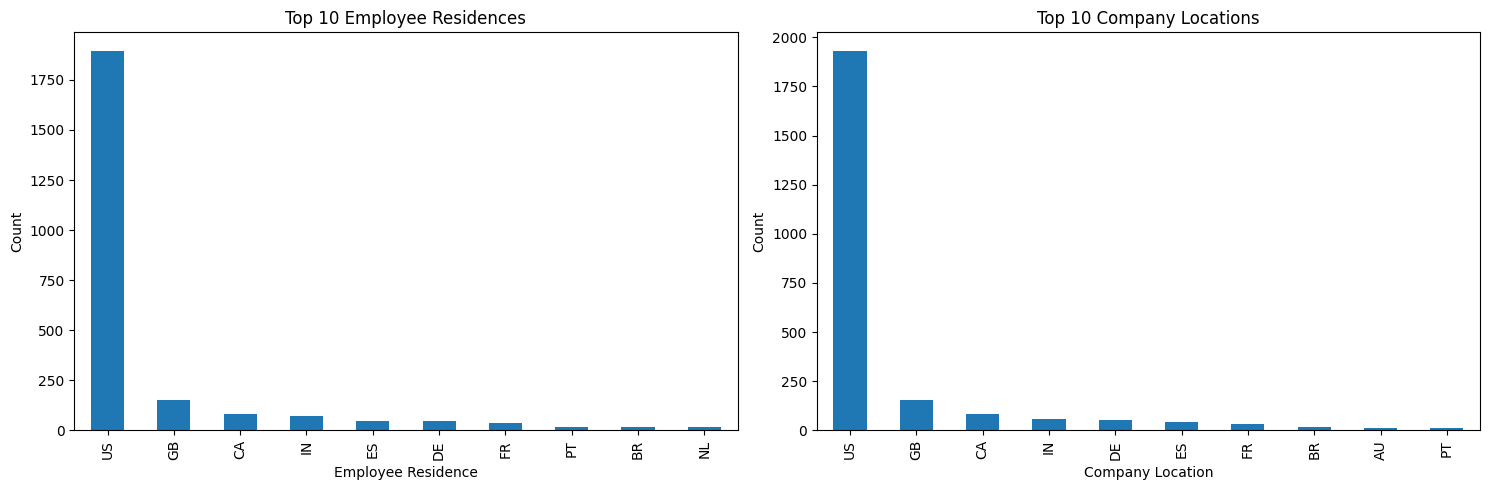

In [53]:
# top 10 de locación de empresas y residencia de empleados
# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1 subplot: Employee Residence
df['employee_residence'].value_counts().head(10).plot(kind='bar', ax=axes[0])
axes[0].set_title('Top 10 Employee Residences')
axes[0].set_xlabel('Employee Residence')
axes[0].set_ylabel('Count')

# 2 subplot: Company Location
df['company_location'].value_counts().head(10).plot(kind='bar', ax=axes[1])
axes[1].set_title('Top 10 Company Locations')
axes[1].set_xlabel('Company Location')
axes[1].set_ylabel('Count')

plt.tight_layout()

plt.show()

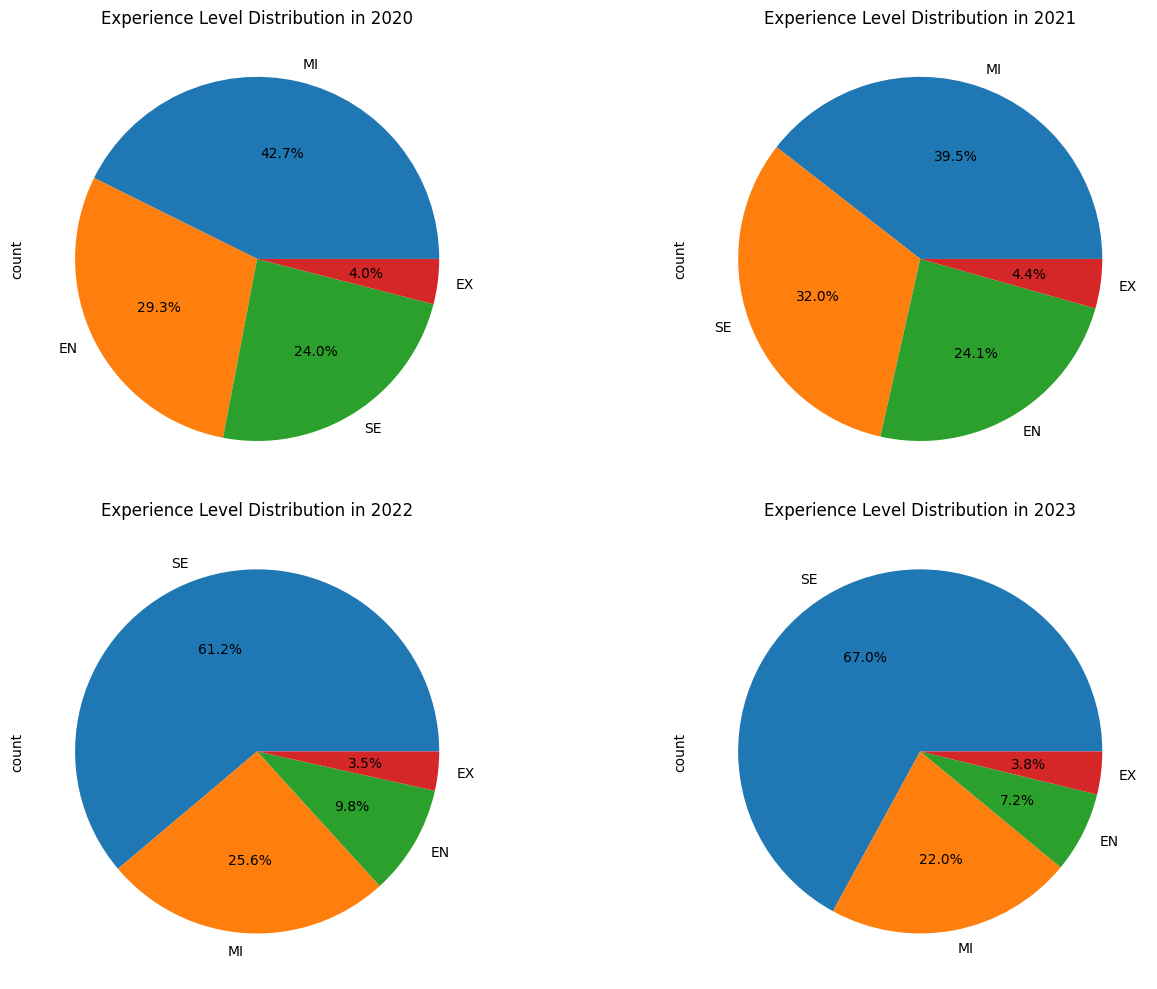

In [63]:
# Gráficos de distribución porcentual del nivel de experiencia según el año
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

years = sorted(df['work_year'].unique())

for i, year in enumerate(years):
    row = i // 2
    col = i % 2

    year_df = df[df['work_year'] == year]

    year_df['experience_level'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[row, col], title=f'Experience Level Distribution in {year}')

plt.tight_layout()
plt.show()

### *Análisis*

Al revisar el top 10 de países de residencia de los empleados y de la localización de las empresas, se puede ver que la gran mayoría en ambos casos están en US (USA), seguido muy por debajo de GB (Gran Bretaña), CA (Canada), IN (India), y así…

También, cuando se revisa la representación porcentual de los diferentes niveles de experiencia conforme los años, es notorio como desde el 2022 el nivel mas bajo (EN o Entry level) tiende a disminuir, mientras que el nivel más superior (SE o Senior) tiende a aumentar, llegando incluso a ser más de la mitad de los datos


## b) Visualizaciones exploratorias multivariadas:
Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

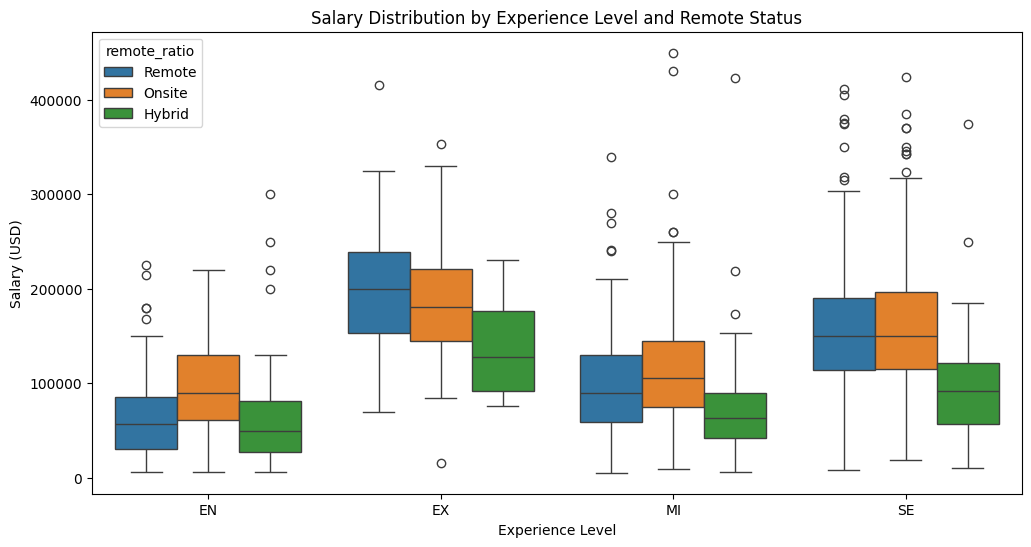

In [41]:
# Boxplot para explorar como están los salarios dependiendo de la experiencia y si la locación

plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', hue='remote_ratio', data=df, order=experience_order)
plt.title('Salary Distribution by Experience Level and Remote Status')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

### *Análisis*
Dependiendo del nivel de experiencia, se puede observar que hay diferencias no solo en el salario, sino también en la locación, así, hay una tendencia en que el nivel más bajo de experiencia (EN o Entry level) sea más representativo el trabajo presencial, seguido del remoto y el híbrido, incluso hay mejor salario si es presencial, algo similar sucede con MI (MID o Semi-Senior).

# 3) Análisis adicional:


## a) Estadísticas descriptivas:
Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

### *Análisis*
Ya se realizó este tipo de análisis más arriba

## b) Identificación de tendencias:
Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

### *Análisis*
Ya se realizó este tipo de análisis más arriba